In [ ]:
!pip install wordcloud


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


word cloud for genre, directors


In [ ]:
df = pd.read_csv('/content/imdb-movies-dataset.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


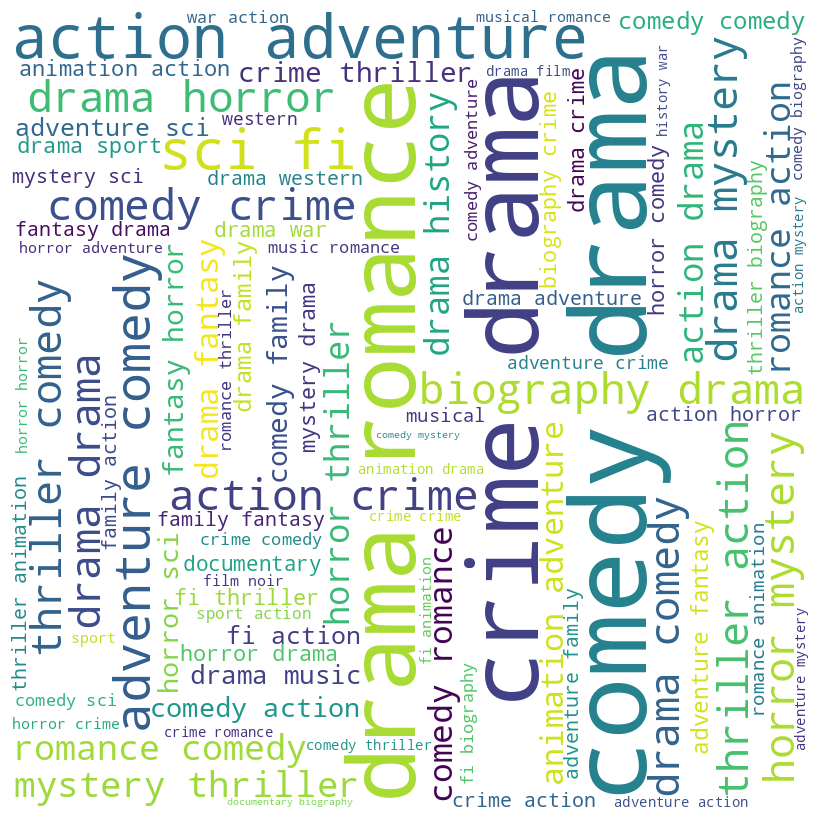

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
comment_words = ''
stopwords = set(STOPWORDS)
for val in df.Genre:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()




BoW


In [ ]:
bow = {}
for i in df["Director"]:
  if i not in bow:
    bow[i] = 1
  else:
    bow[i] += 1
for key,value in bow.items():

  print(key,value)


Michael Showalter 5
Wes Ball 6
Jerry Seinfeld 1
David Leitch 7
Luca Guadagnino 9
Matt Bettinelli-Olpin 6
Alex Garland 5
Lee Isaac Chung 3
Will Gluck 7
Guy Ritchie 18
Denis Villeneuve 11
George Miller 14
Takashi Yamazaki 2
Gil Kenan 4
Rose Glass 2
David Dobkin 5
Mark Waters 10
John Krasinski 4
Francis Ford Coppola 20
Cameron Cairnes 1
Kiran Rao 1
Shawn Levy 14
Matt Reeves 6
Dev Patel 1
Vikas Bahl 2
Spenser Cohen 1
Adam Wingard 6
Yorgos Lanthimos 7
Benjamin Brewer 1
George Lucas 6
Hannah Marks 2
Rupert Wyatt 4
Christopher Nolan 12
Tim Burton 20
Sean Durkin 3
Sam Taylor-Johnson 4
David Ayer 10
Doug Liman 14
James Gunn 7
Matthew Vaughn 9
Tom Brady 2
Jade Halley Bartlett 1
Zach Cregger 3
Alexander Payne 7
Mark Dindal 4
Zack Snyder 12
Rupert Sanders 3
Mike Mitchell 7
Jonathan Glazer 4
Chris Renaud 4
Michael Mohan 2
Franklin J. Schaffner 5
Jae-hyun Jang 2
Greta Gerwig 3
James Cameron 10
Robert Lorenz 3
Olivia Newman 1
Chris Nash 1
Richard L. Ramsey 1
Elizabeth Allen Rosenbaum 4
Michael Sarnos

Sentiment Analysis

In [ ]:
df['Review_'] = df['Review'].astype(str)
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()

text = df['Review_'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

def sentiment_an(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'Positive'
    elif sentiment['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Review_'].apply(sentiment_an)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


tf-idf

In [ ]:
df_cleaned = df.dropna()

In [ ]:
df = df.dropna(subset=['Rating', 'Genre', 'Director', 'Cast'])

tfidf_genre = TfidfVectorizer()
tfidf_director = TfidfVectorizer()
tfidf_cast = TfidfVectorizer()

tfidf_genre_matrix = tfidf_genre.fit_transform(df['Genre'])
tfidf_director_matrix = tfidf_director.fit_transform(df['Director'])
tfidf_cast_matrix = tfidf_cast.fit_transform(df['Cast'])

X = hstack([tfidf_genre_matrix, tfidf_director_matrix, tfidf_cast_matrix])

y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2_score = model.score(X_test, y_test)
print(f"R-squared: {r2_score}")

Mean Squared Error: 0.8439455282165411
R-squared: 0.23943252506379908


In [ ]:
def predict_rating(director, genre, cast):
    director_tfidf = tfidf_director.transform([director])
    genre_tfidf = tfidf_genre.transform([genre])
    cast_tfidf = tfidf_cast.transform([cast])

    input_features = hstack([genre_tfidf, director_tfidf, cast_tfidf])

    predicted_rating = model.predict(input_features)

    return predicted_rating[0]

new_director = "Christopher Nolan"
new_genre = "Action, Superhero, Noir"
new_cast = "Christian Bale, Michael Caine, Heath Ledger, Gary Oldman, Aaron Eckhart, Maggie Gyllenhaal, Morgan Freeman"

predicted_rating = predict_rating(new_director, new_genre, new_cast)
print(f"Predicted Rating: {predicted_rating}")

Predicted Rating: 6.885999999999998
